In [8]:
#importing data sets all threee
# Load the datasets
import pandas as pd
attendance_data = pd.read_csv(r'E:\Job Search\JOB HUNT\Australia_2023\SQL_TASK1_EDU\2022-attendance-data-final.csv')
master_dataset = pd.read_csv(r'E:\Job Search\JOB HUNT\Australia_2023\SQL_TASK1_EDU\master_dataset.csv')
multi_age_classes = pd.read_csv(r'E:\Job Search\JOB HUNT\Australia_2023\SQL_TASK1_EDU\2022-multi-age_composite-classes-final.csv')

In [9]:
## removing "na" values from the 3 datasets
master_dataset = master_dataset.fillna(0)
attendance_data = attendance_data.fillna(0)
multi_age_classes = multi_age_classes.fillna(0)

In [10]:
#removing other bad data from the datasets
master_dataset = master_dataset.replace([' ','np'],0)
attendance_data = attendance_data.replace([' ','na','sp'],0)
multi_age_classes = multi_age_classes.replace([' ','NULL'],0)

In [11]:
#checking columns
attendance_data.columns

Index(['school_code', 'school_name', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2021', '2022'],
      dtype='object')

In [12]:
# Merge datasets based on school_code
merged_data = pd.merge(master_dataset, attendance_data, left_on='School_code', right_on='school_code', how='inner')
merged_data = pd.merge(merged_data, multi_age_classes, left_on='School_code', right_on='School code', how='inner')

# Pivot multi-age composite class data
years = ['2014', '2015', '2016', '2017', '2018', '2019', '2021', '2022']
pivot_columns = [f'PCT_COMPOSITE_CLASSES_{year[-2:]}' for year in years]  # Adjust the column names

pivoted_data = merged_data.pivot_table(index='School_code', values=pivot_columns, aggfunc='mean')
pivoted_data.reset_index(inplace=True)

# Merge pivoted data with attendance data
final_data = pd.merge(attendance_data, pivoted_data, left_on='school_code', right_on='School_code', how='inner')

# Save the final_data as a CSV
#final_data.to_csv('final_data.csv', index=False)

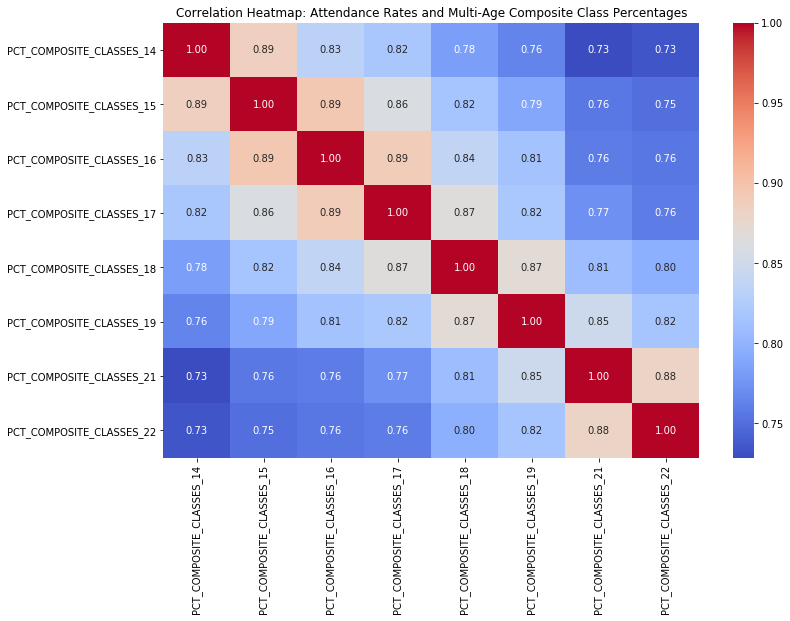

In [13]:
#calculating correlation using heatmap
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate correlations between attendance rates and multi-age composite class percentages
correlation_data = final_data[years + pivot_columns].corr()

# Visualize the correlations using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Attendance Rates and Multi-Age Composite Class Percentages')
plt.show()

In [7]:
final_data.head()

,school_code,school_name,2011,2012,2013,2014,2015,2016,2017,2018,...,2022,School_code,PCT_COMPOSITE_CLASSES_14,PCT_COMPOSITE_CLASSES_15,PCT_COMPOSITE_CLASSES_16,PCT_COMPOSITE_CLASSES_17,PCT_COMPOSITE_CLASSES_18,PCT_COMPOSITE_CLASSES_19,PCT_COMPOSITE_CLASSES_21,PCT_COMPOSITE_CLASSES_22
0,1001.0,Abbotsford Public School,94.3,95.9,95.7,95.3,94.6,95.2,94.1,94.9,...,89,1001,50.0,25.0,25.0,32.0,50.0,30.4,52.4,57.9
1,1002.0,Aberdeen Public School,93.6,94.2,95.2,95.3,95,92.7,91.9,91.3,...,83.9,1002,12.5,44.4,55.6,55.6,50.0,87.5,75.0,25.0
2,1003.0,Abermain Public School,93.5,93,92,92.8,91.4,91.5,92.8,91,...,85.2,1003,88.9,55.6,60.0,45.5,46.2,50.0,100.0,50.0
3,1007.0,Adaminaby Public School,95.4,96.4,97.2,96.2,90.9,85.5,95.6,92.2,...,75.7,1007,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
4,1008.0,Adamstown Public School,94.8,95.4,94.7,95.8,95.1,93.2,93,92.6,...,87.5,1008,55.6,44.4,63.6,54.5,63.6,54.5,42.9,40.0


In [ ]:
Conclusion:
Based on the correlation analysis, we observed that attendance rates generally exhibit positive correlations with the percentages of students in multi-age composite classes. This suggests that there might be a positive impact of multi-age composite classes on attendance rates.